In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
from google.colab import files
uploaded = files.upload()

!unzip -q "archive (9).zip" -d garbage_data
!ls -R garbage_data


Saving archive (9).zip to archive (9).zip
garbage_data:
'garbage classification'  'Garbage classification'

'garbage_data/garbage classification':
'Garbage classification'

'garbage_data/garbage classification/Garbage classification':
cardboard  glass  metal  paper	plastic  trash

'garbage_data/garbage classification/Garbage classification/cardboard':
cardboard100.jpg  cardboard194.jpg  cardboard284.jpg  cardboard374.jpg
cardboard101.jpg  cardboard195.jpg  cardboard285.jpg  cardboard375.jpg
cardboard102.jpg  cardboard196.jpg  cardboard286.jpg  cardboard376.jpg
cardboard103.jpg  cardboard197.jpg  cardboard287.jpg  cardboard377.jpg
cardboard104.jpg  cardboard198.jpg  cardboard288.jpg  cardboard378.jpg
cardboard105.jpg  cardboard199.jpg  cardboard289.jpg  cardboard379.jpg
cardboard106.jpg  cardboard19.jpg   cardboard28.jpg   cardboard37.jpg
cardboard107.jpg  cardboard1.jpg    cardboard290.jpg  cardboard380.jpg
cardboard108.jpg  cardboard200.jpg  cardboard291.jpg  cardboard381.jpg
cardboar

In [6]:
dataset_path = "/content/garbage_data/Garbage classification/Garbage classification"

class_names = os.listdir("/content/garbage_data/Garbage classification/Garbage classification"
)

print("Classes:", class_names)
for cls in class_names:
    print(cls, "->", len(os.listdir(os.path.join(dataset_path, cls))), "images")


Classes: ['metal', 'cardboard', 'trash', 'glass', 'plastic', 'paper']
metal -> 410 images
cardboard -> 400 images
trash -> 137 images
glass -> 501 images
plastic -> 482 images
paper -> 594 images


In [4]:
!ls -R /content/garbage_data


/content/garbage_data:
'garbage classification'  'Garbage classification'

'/content/garbage_data/garbage classification':
'Garbage classification'

'/content/garbage_data/garbage classification/Garbage classification':
cardboard  glass  metal  paper	plastic  trash

'/content/garbage_data/garbage classification/Garbage classification/cardboard':
cardboard100.jpg  cardboard194.jpg  cardboard284.jpg  cardboard374.jpg
cardboard101.jpg  cardboard195.jpg  cardboard285.jpg  cardboard375.jpg
cardboard102.jpg  cardboard196.jpg  cardboard286.jpg  cardboard376.jpg
cardboard103.jpg  cardboard197.jpg  cardboard287.jpg  cardboard377.jpg
cardboard104.jpg  cardboard198.jpg  cardboard288.jpg  cardboard378.jpg
cardboard105.jpg  cardboard199.jpg  cardboard289.jpg  cardboard379.jpg
cardboard106.jpg  cardboard19.jpg   cardboard28.jpg   cardboard37.jpg
cardboard107.jpg  cardboard1.jpg    cardboard290.jpg  cardboard380.jpg
cardboard108.jpg  cardboard200.jpg  cardboard291.jpg  cardboard381.jpg
cardboard109.j

In [5]:
dataset_path = "/content/garbage_data/Garbage classification/Garbage classification"


In [32]:
import os
for root, dirs, files in os.walk("/content/garbage_data"):
    if sorted(dirs) == sorted(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']):
        dataset_path = root
        break

print("Found dataset path:", dataset_path)


Found dataset path: /content/garbage_data/garbage classification/Garbage classification


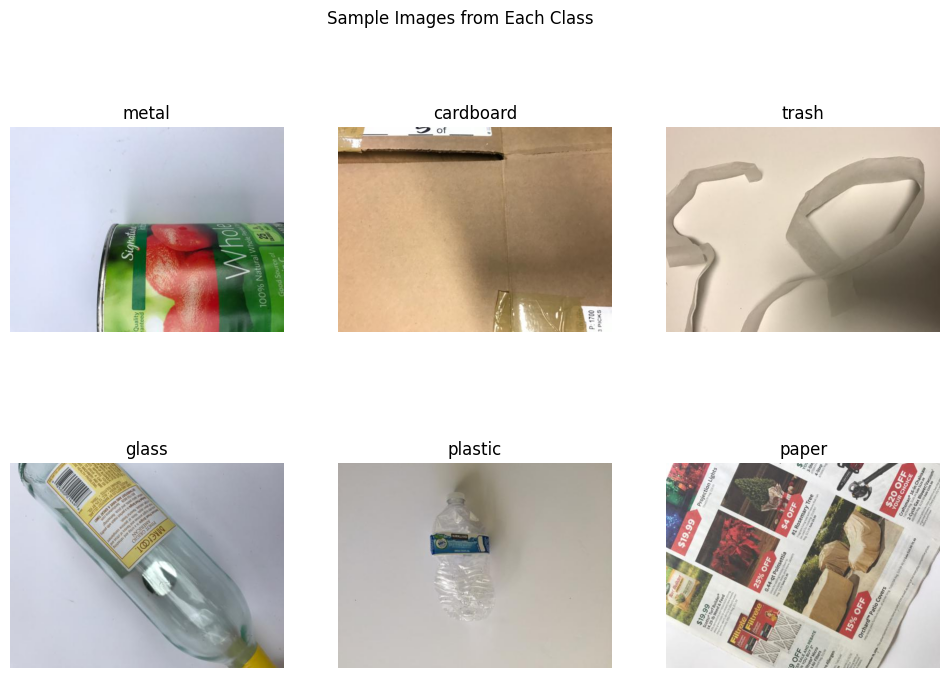

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 8))
for i, cls in enumerate(class_names):
    class_folder = os.path.join(dataset_path, cls)
    img_path = os.path.join(class_folder, random.choice(os.listdir(class_folder)))
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()


In [9]:
image_size = (260, 260)
batch_size = 32
seed = 42

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_ds = val_ds.skip(val_batches // 2)

train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)


Found 2524 files belonging to 6 classes.
Using 2020 files for training.
Found 2524 files belonging to 6 classes.
Using 504 files for validation.


In [10]:
base_model = EfficientNetV2B2(include_top=False, weights="imagenet", input_shape=(260, 260, 3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(len(class_names), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model.compile(optimizer=Adam(0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 71s 569ms/step - accuracy: 0.2431 - loss: 1.7731 - val_accuracy: 0.5242 - val_loss: 1.4426
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.4832 - loss: 1.4393 - val_accuracy: 0.6411 - val_loss: 1.2351
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.6150 - loss: 1.2348 - val_accuracy: 0.7177 - val_loss: 1.0840
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6681 - loss: 1.0903 - val_accuracy: 0.7379 - val_loss: 0.9691
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7064 - loss: 0.9926 - val_accuracy: 0.7702 - val_loss: 0.8822
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7372 - loss: 0.8963 - val_accuracy: 0.7782 - val_loss: 0.8125
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7659 - loss: 0.8264 - val_accuracy: 0.7944 - val_loss: 0.7557
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.7750 - loss: 0.7810 - val_accuracy: 0.8105 

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260, 260,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 260, 260,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 260, 260,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 130, 130,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 130, 130,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 130, 130,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 130, 130,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 130, 130,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 130, 130,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 130, 130,  │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 130, 130,  │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 130, 130,  │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 130, 130,  │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 130, 130,  │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 65, 65,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 65, 65,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 65, 65,    │          0 │ block2a_expand_b

 Total params: 8,794,738 (33.55 MB)

 Trainable params: 8,454 (33.02 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

 Optimizer params: 16,910 (66.06 KB)

In [18]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260, 260,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 260, 260,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 260, 260,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 130, 130,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 130, 130,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 130, 130,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 130, 130,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 130, 130,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 130, 130,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 130, 130,  │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 130, 130,  │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 130, 130,  │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 130, 130,  │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 130, 130,  │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 65, 65,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 65, 65,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 65, 65,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,769,374 (33.45 MB)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]



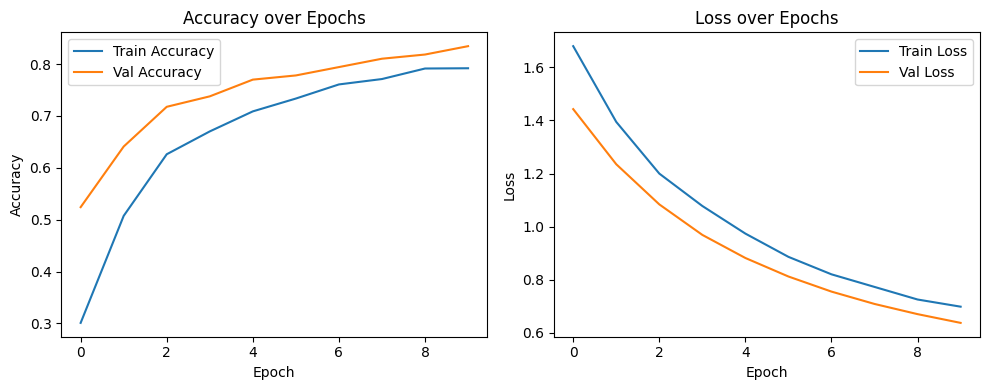

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8364 - loss: 0.5983
Test Accuracy: 0.84


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


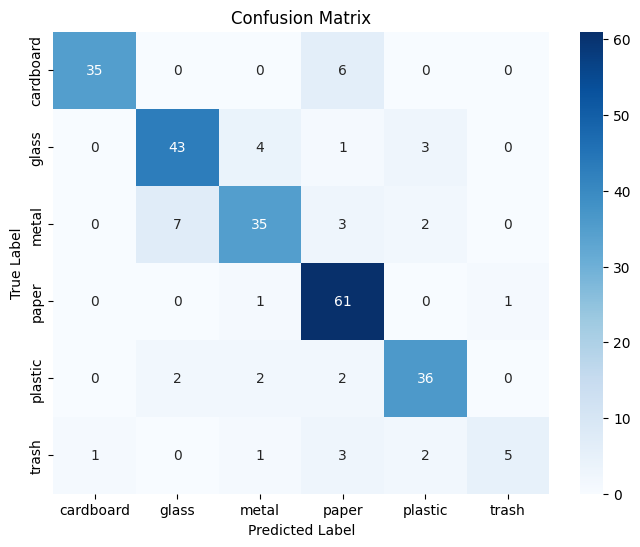

Classification Report:

              precision    recall  f1-score   support

   cardboard       0.97      0.85      0.91        41
       glass       0.83      0.84      0.83        51
       metal       0.81      0.74      0.78        47
       paper       0.80      0.97      0.88        63
     plastic       0.84      0.86      0.85        42
       trash       0.83      0.42      0.56        12

    accuracy                           0.84       256
   macro avg       0.85      0.78      0.80       256
weighted avg       0.84      0.84      0.84       256



In [34]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [21]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8364 - loss: 0.5983

Test Accuracy: 0.8398
Test Accuracy: 83.98%
Test Loss: 0.6021


In [24]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names

train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)


Found 2524 files belonging to 6 classes.
Using 2020 files for training.


In [25]:
print(class_names)


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


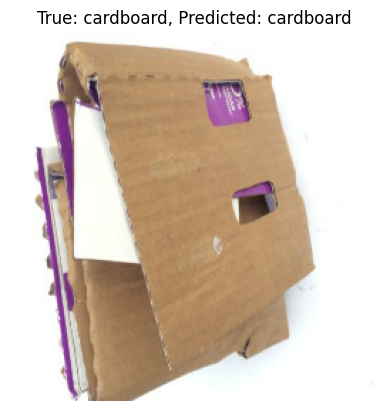

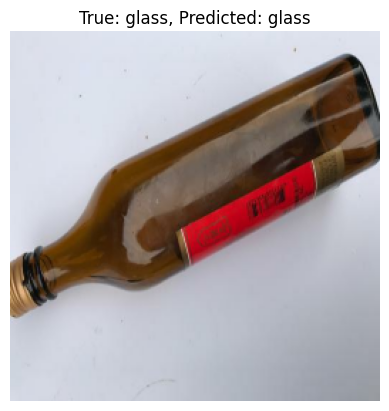

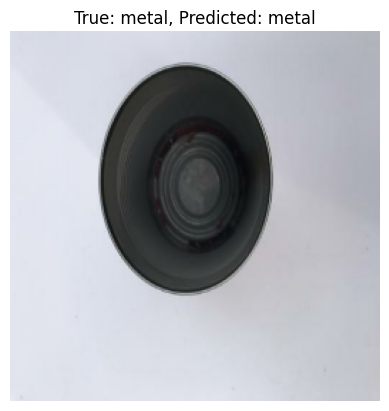

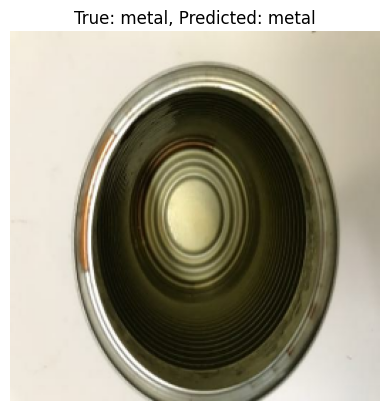

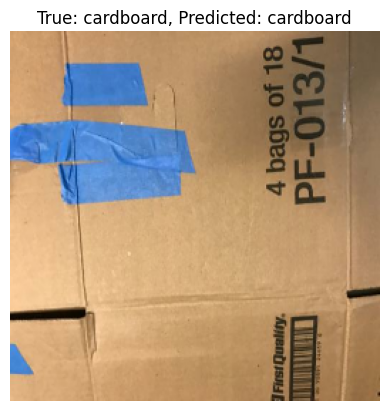

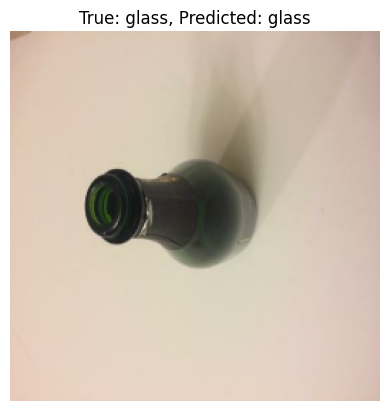

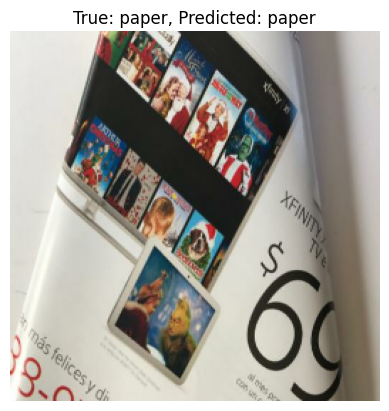

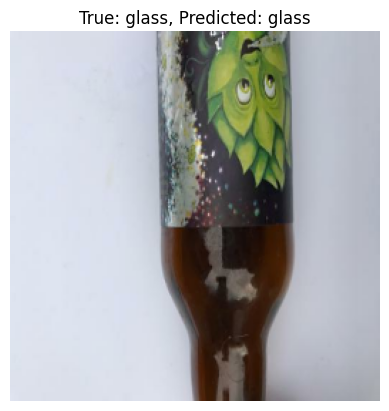

In [27]:

for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions, axis=1)

    for i in range(min(8, len(images))):
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        predicted_label = class_names[pred_labels[i]]
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis("off")
        plt.show()


In [31]:
model.save("efficientnetv2b2_garbage_classifier.keras")
print(" Model saved successfully in modern format (.keras)")



 Model saved successfully in modern format (.keras)
